In [2]:
import pandas as pd
from pybaseball import pitching_stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
stat23 = pitching_stats(2023)
stat24 = pitching_stats(2024)

In [4]:
def reformat_name(name):
    parts = name.split()
    first, last = parts
    return f"{last}, {first}"

stat23['Name'] = stat23['Name'].apply(reformat_name)

stat23 = stat23.rename(columns={
    'Name': 'player_name'
})

stat24 = stat24.rename(columns={
    'Name': 'player_name'
})

In [5]:
scores = pd.read_csv("pitch_scores_testing.csv")

In [ ]:
joined_data_23 = stat23.merge(scores,how='left',on='player_name')
joined_data_23.dropna()

joined_data_24 = stat24.merge(scores,how='left',on='player_name')
joined_data_24.dropna()

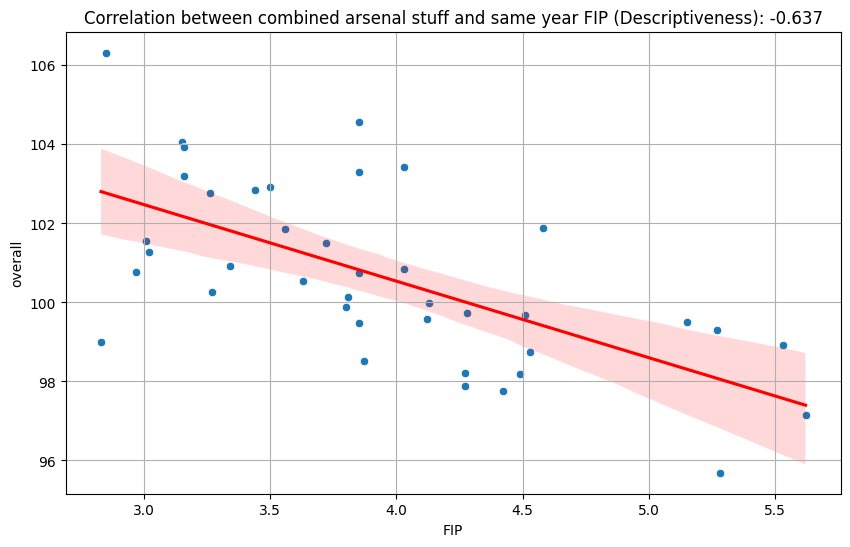

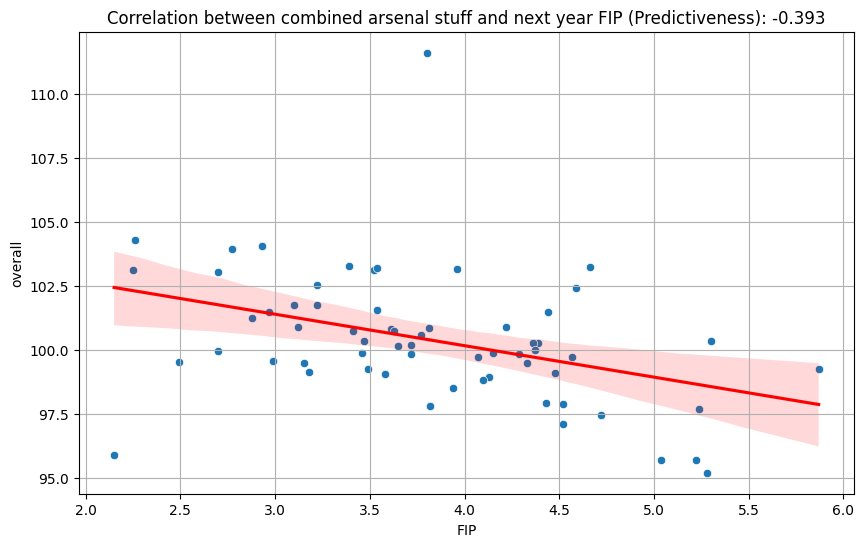

In [8]:
def filter_pitch(df, pitch):
    return df[df[pitch]>0]

stat = 'FIP'
pitch = 'overall'

filtered_data_23 = filter_pitch(joined_data_23, pitch)
filtered_data_24 = filter_pitch(joined_data_24, pitch)

correlation_23 = filtered_data_23[stat].corr(filtered_data_23[pitch])
correlation_24 = filtered_data_24[stat].corr(filtered_data_24[pitch])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=stat, y=pitch, data=filtered_data_23)
sns.regplot(x=stat, y=pitch, data=filtered_data_23, scatter=False, color='red')
plt.title(f"Correlation between combined arsenal stuff and same year FIP (Descriptiveness): {correlation_23:.3f}")
plt.grid(True)
#plt.show()
plt.savefig('descriptive.png')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=stat, y=pitch, data=filtered_data_24)
sns.regplot(x=stat, y=pitch, data=filtered_data_24, scatter=False, color='red')
plt.title(f"Correlation between combined arsenal stuff and next year FIP (Predictiveness): {correlation_24:.3f}")
plt.grid(True)
#plt.show()
plt.savefig('predictive.png')
